In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap
import numpy as np
import math

### Cargando datos y pre-procesamiento

In [95]:
path = r'../pettyTheft/outputs/preds_pt_improved_uniform.csv'

df = pd.read_csv(path)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.rename(columns={'0': 'label_value'}, inplace=True)
df['age'] = df['age_uniform'].astype(int)
df.drop(columns=['age_uniform'], inplace=True)
df

,region,barrister,effective_hearings,crime_stage,score,label_value,age
0,La Araucanía,Eugenio Arturo Saez Infante,1,Consumado,0,0,45
1,Maule,Claudia Angélica Landeros Garrido,1,Consumado,0,0,19
2,Coquimbo,Francisco Salazar Castillo,3,Consumado,1,0,48
3,Libertador Bernardo O'Higgins,Jose Ignacio Barahona Cabezas,10,Consumado,0,1,37
4,Metropolitana,Eduardo Libretti Peña,1,Frustrado,0,0,55
...,...,...,...,...,...,...,...
11982,Metropolitana,Karina Bettini Silva,1,Frustrado,0,0,47
11983,Magallanes y Antártica Chilena,Leonardo Humberto Vallejos Ramirez,1,Frustrado,0,0,34
11984,Metropolitana,Ivo Arteaga Cartagena,0,Consumado,1,1,24
11985,Metropolitana,Macarena Albornoz Garrido,1,Frustrado,0,0,24


In [96]:
## Cambio age a intervalos

values = np.round(np.linspace(df['age'].min(),df['age'].max()+1,5))

interval = []

for i in df['age'].values:
  if math.isnan(i):
    interval.append('Not found')
  else:
    for j in range(len(values)):
      if values[j] != max(values):
        if i>= values[j] and i< values[j+1]:
          interval.append(str(values[j]) + ' - ' + str(values[j+1]))
      else:
        if i>= values[j]:
          interval.append('More than ' + str(values[j]))
df['age']=interval

In [97]:
## Creación de variable "zone"

df['zone'] = np.nan

norte = ['Tarapacá', 'Arica y Parinacota', 'Antofagasta', 'Atacama', "Coquimbo"]
centro = ['Metropolitana', 'Valparaíso', 'Maule', "Libertador Bernardo O'Higgins", 'Ñuble']
sur = ['Los Lagos', 'Bio Bío', 'Magallanes y Antártica Chilena', 'La Araucanía', 'Los Ríos', 'Aysén']

for i in range(len(df)):
    if df['region'][i] in norte:
        df['zone'][i] = 'Northern Chile'
    elif df['region'][i] in centro:
        df['zone'][i] = 'Central Chile'
    elif df['region'][i] in sur:
        df['zone'][i] = 'Southern Chile'

In [98]:
df

,region,barrister,effective_hearings,crime_stage,score,label_value,age,zone
0,La Araucanía,Eugenio Arturo Saez Infante,1,Consumado,0,0,42.0 - 54.0,Southern Chile
1,Maule,Claudia Angélica Landeros Garrido,1,Consumado,0,0,18.0 - 30.0,Central Chile
2,Coquimbo,Francisco Salazar Castillo,3,Consumado,1,0,42.0 - 54.0,Northern Chile
3,Libertador Bernardo O'Higgins,Jose Ignacio Barahona Cabezas,10,Consumado,0,1,30.0 - 42.0,Central Chile
4,Metropolitana,Eduardo Libretti Peña,1,Frustrado,0,0,54.0 - 66.0,Central Chile
...,...,...,...,...,...,...,...,...
11982,Metropolitana,Karina Bettini Silva,1,Frustrado,0,0,42.0 - 54.0,Central Chile
11983,Magallanes y Antártica Chilena,Leonardo Humberto Vallejos Ramirez,1,Frustrado,0,0,30.0 - 42.0,Southern Chile
11984,Metropolitana,Ivo Arteaga Cartagena,0,Consumado,1,1,18.0 - 30.0,Central Chile
11985,Metropolitana,Macarena Albornoz Garrido,1,Frustrado,0,0,18.0 - 30.0,Central Chile


### Visualizaciones por valor predecido

<AxesSubplot:xlabel='age', ylabel='count'>

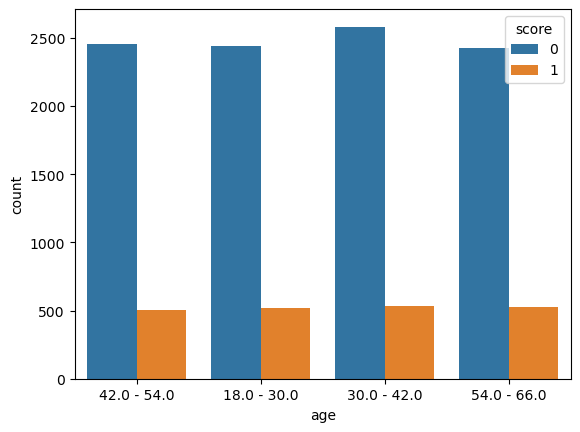

In [99]:
sns.countplot(x="age", hue="score", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'La Araucanía'),
  Text(1, 0, 'Maule'),
  Text(2, 0, 'Coquimbo'),
  Text(3, 0, "Libertador Bernardo O'Higgins"),
  Text(4, 0, 'Metropolitana'),
  Text(5, 0, 'Los Lagos'),
  Text(6, 0, 'Valparaíso'),
  Text(7, 0, 'Bio Bío'),
  Text(8, 0, 'Atacama'),
  Text(9, 0, 'Tarapacá'),
  Text(10, 0, 'Arica y Parinacota'),
  Text(11, 0, 'Aysén'),
  Text(12, 0, 'Los Ríos'),
  Text(13, 0, 'Magallanes y Antártica Chilena'),
  Text(14, 0, 'Antofagasta'),
  Text(15, 0, 'Ñuble')])

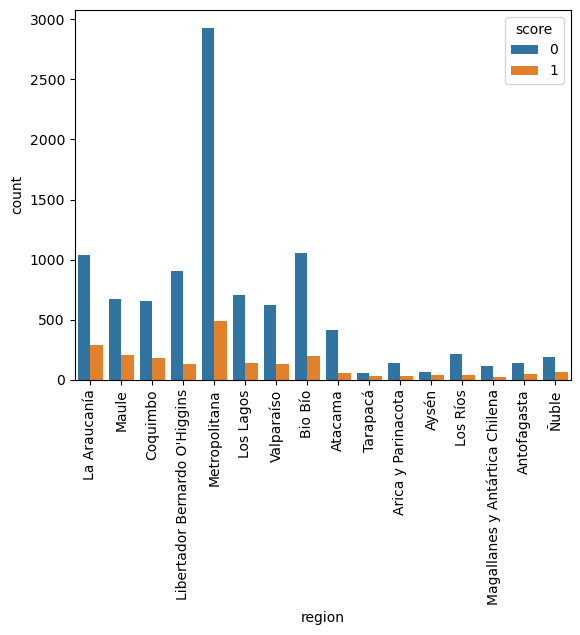

In [100]:
sns.countplot(x="region", hue="score", data=df)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='zone', ylabel='count'>

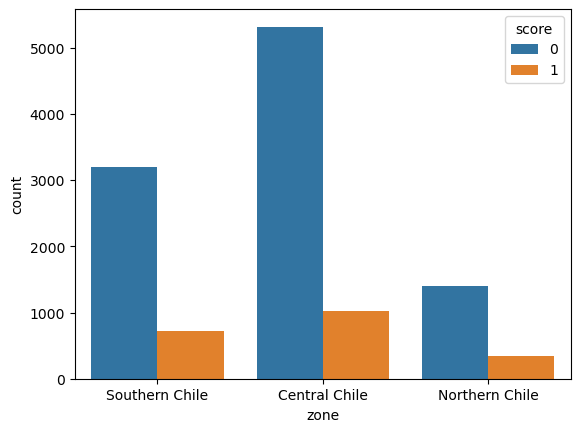

In [101]:
sns.countplot(x="zone", hue="score", data=df)

### Visualización resultados actuales

<AxesSubplot:xlabel='age', ylabel='count'>

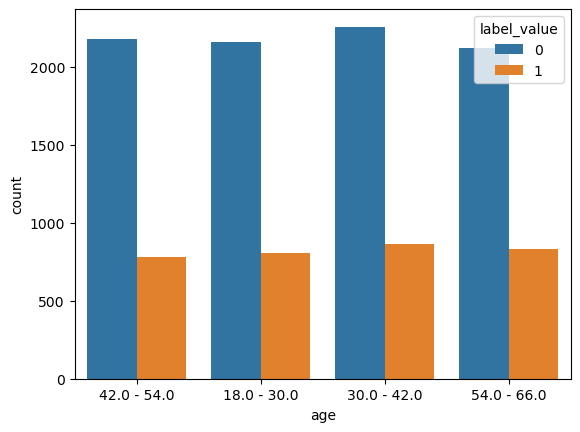

In [102]:
sns.countplot(x="age", hue="label_value", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'La Araucanía'),
  Text(1, 0, 'Maule'),
  Text(2, 0, 'Coquimbo'),
  Text(3, 0, "Libertador Bernardo O'Higgins"),
  Text(4, 0, 'Metropolitana'),
  Text(5, 0, 'Los Lagos'),
  Text(6, 0, 'Valparaíso'),
  Text(7, 0, 'Bio Bío'),
  Text(8, 0, 'Atacama'),
  Text(9, 0, 'Tarapacá'),
  Text(10, 0, 'Arica y Parinacota'),
  Text(11, 0, 'Aysén'),
  Text(12, 0, 'Los Ríos'),
  Text(13, 0, 'Magallanes y Antártica Chilena'),
  Text(14, 0, 'Antofagasta'),
  Text(15, 0, 'Ñuble')])

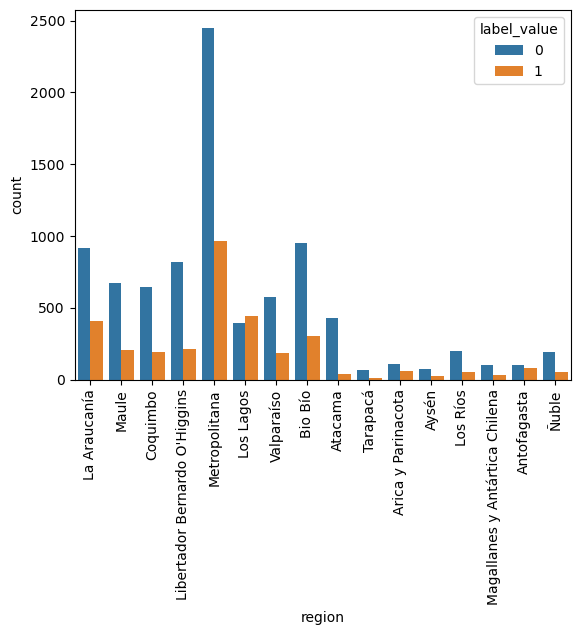

In [103]:
sns.countplot(x="region", hue="label_value", data=df)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='zone', ylabel='count'>

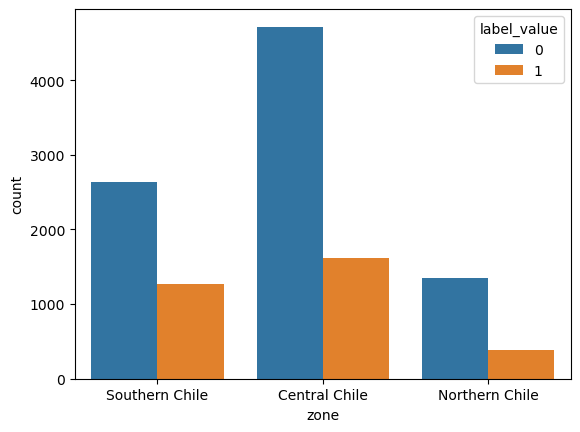

In [104]:
sns.countplot(x="zone", hue="label_value", data=df)

## Probando Aequitas

### Métricas de sesgo entre grupos

In [105]:
df.drop(['barrister', 'effective_hearings'], axis=1, inplace = True)
df

,region,crime_stage,score,label_value,age,zone
0,La Araucanía,Consumado,0,0,42.0 - 54.0,Southern Chile
1,Maule,Consumado,0,0,18.0 - 30.0,Central Chile
2,Coquimbo,Consumado,1,0,42.0 - 54.0,Northern Chile
3,Libertador Bernardo O'Higgins,Consumado,0,1,30.0 - 42.0,Central Chile
4,Metropolitana,Frustrado,0,0,54.0 - 66.0,Central Chile
...,...,...,...,...,...,...
11982,Metropolitana,Frustrado,0,0,42.0 - 54.0,Central Chile
11983,Magallanes y Antártica Chilena,Frustrado,0,0,30.0 - 42.0,Southern Chile
11984,Metropolitana,Consumado,1,1,18.0 - 30.0,Central Chile
11985,Metropolitana,Frustrado,0,0,18.0 - 30.0,Central Chile


In [106]:
g = Group()
xtab, _ = g.get_crosstabs(df)

In [107]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [108]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,2083,region,Antofagasta,45,139,11,47,92,34,81,103,184,11987
1,0,binary 0/1,2083,region,Arica y Parinacota,32,136,18,48,88,14,62,106,168,11987
2,0,binary 0/1,2083,region,Atacama,52,413,32,17,396,20,37,428,465,11987
3,0,binary 0/1,2083,region,Aysén,39,64,25,13,51,14,27,76,103,11987
4,0,binary 0/1,2083,region,Bio Bío,194,1058,68,176,882,126,302,950,1252,11987
5,0,binary 0/1,2083,region,Coquimbo,184,655,106,113,542,78,191,648,839,11987
6,0,binary 0/1,2083,region,La Araucanía,285,1039,146,267,772,139,406,918,1324,11987
7,0,binary 0/1,2083,region,Libertador Bernardo O'Higgins,132,902,60,142,760,72,214,820,1034,11987
8,0,binary 0/1,2083,region,Los Lagos,141,701,50,354,347,91,445,397,842,11987
9,0,binary 0/1,2083,region,Los Ríos,38,214,18,33,181,20,53,199,252,11987


In [109]:
# Filtrar las columnas relevantes
relevant_cols = ['attribute_name', 'attribute_value', 'pp', 'pn', 'fp', 'fn', 'tn', 'tp']
filtered_xtab = xtab[relevant_cols]

# Agrupar por 'attribute_name' y sumar los falsos negativos
fn_by_feature = filtered_xtab.groupby('attribute_name')['fn'].sum().reset_index()
filtered_xtab[filtered_xtab['attribute_name']=='region']

# Calculando métricas
filtered_xtab['tpr'] = filtered_xtab['tp'] / (filtered_xtab['tp'] + filtered_xtab['fn'])
filtered_xtab['fnr'] = filtered_xtab['fn'] / (filtered_xtab['fn'] + filtered_xtab['tp'])
filtered_xtab['for'] = filtered_xtab['fn'] / (filtered_xtab['fn'] + filtered_xtab['tn'])
filtered_xtab['fdr'] = filtered_xtab['fp'] / (filtered_xtab['fp'] + filtered_xtab['tp'])

# Para evitar el warning de pandas sobre la asignación de valores a un slice de un df
pd.set_option('mode.chained_assignment', None)

# Filtramos solo las filas para 'Region'
region_metrics = filtered_xtab[filtered_xtab['attribute_name'] == 'region']

# Mostrar el resultado

region_metrics.to_csv("outputs/region_metrics_hfalta_opt.csv", index=False)

In [110]:
print(region_metrics['tpr'].mean())
print(region_metrics['fnr'].mean())
print(region_metrics['for'].mean())
print(region_metrics['fdr'].mean())

0.36538405036735255
0.6346159496326474
0.22029860771247542
0.5283836722792785


In [111]:
# Filtramos las filas relevantes
region_rows = xtab[xtab['attribute_name'] == 'region']

# Calculamos las métricas
total_fp = region_rows['fp'].sum()
total_fn = region_rows['fn'].sum()
total_tp = region_rows['tp'].sum()
total_tn = region_rows['tn'].sum()

fpr = total_fp / (total_fp + total_tn)
fnr = total_fn / (total_fn + total_tp)
for_rate = total_fn / (total_fn + total_tn)
fdr = total_fp / (total_fp + total_tp)

print(f"False Positive Rate (FPR) for Region: {fpr:.4f}")
print(f"False Negative Rate (FNR) for Region: {fnr:.4f}")
print(f"False Omission Rate (FOR) for Region: {for_rate:.4f}")
print(f"False Discovery Rate (FDR) for Region: {fdr:.4f}")

False Positive Rate (FPR) for Region: 0.1114
False Negative Rate (FNR) for Region: 0.6603
False Omission Rate (FOR) for Region: 0.2184
False Discovery Rate (FDR) for Region: 0.4657


### Glosario del crosstab:

- k = Cantidad de predicciones positivas (suma de 1s).
- pp = Cantidad de ítems del grupo que fueron predecidos como Positivo.
- pn = Cantidad de ítems del grupo que fueron predecidos como Negativo.
- fp = Cantidad de ítems del grupo que son falsos positivos.
- fn = Cantidad de ítems del grupo que son falsos negativos.
- tn = Cantidad de ítems del grupo que son realmente negativos.
- tp = Cantidad de ítems del grupo que son realmente positivos.

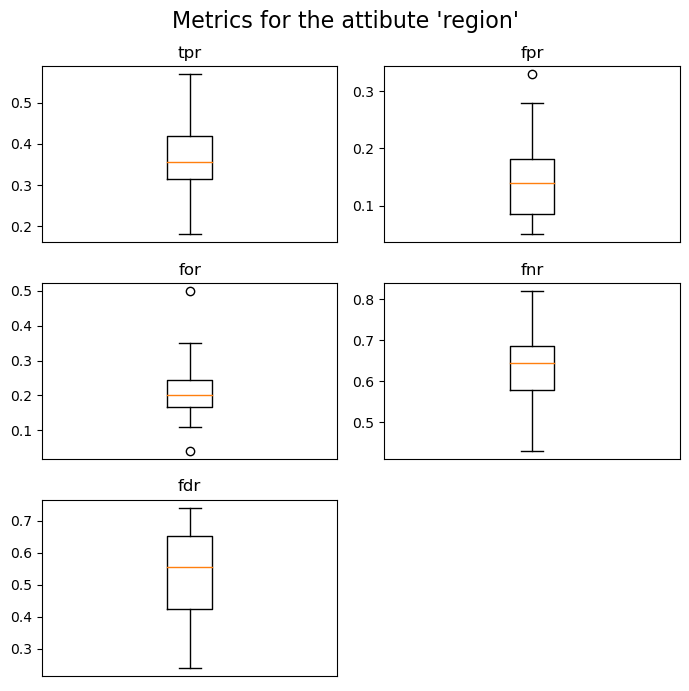

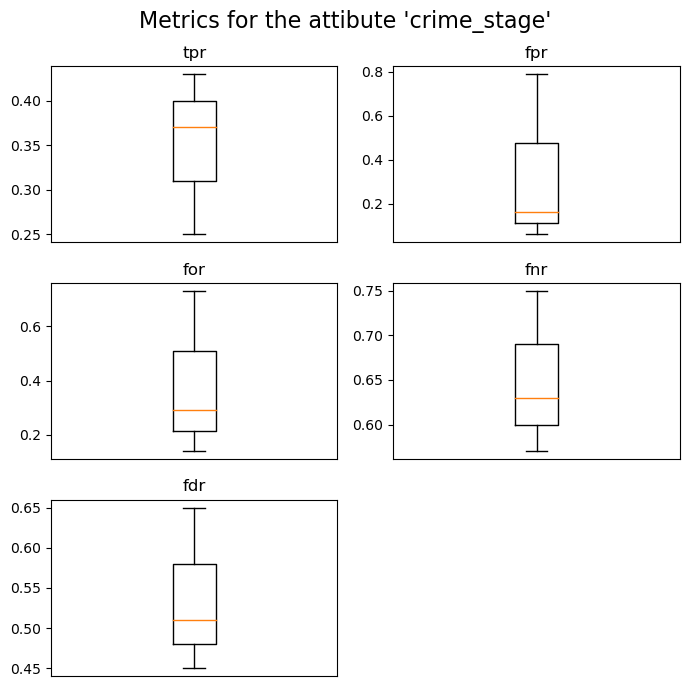

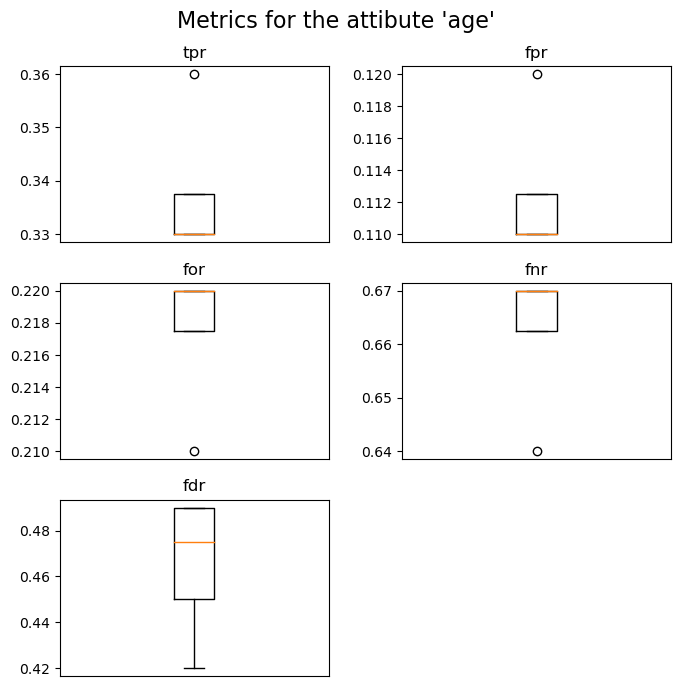

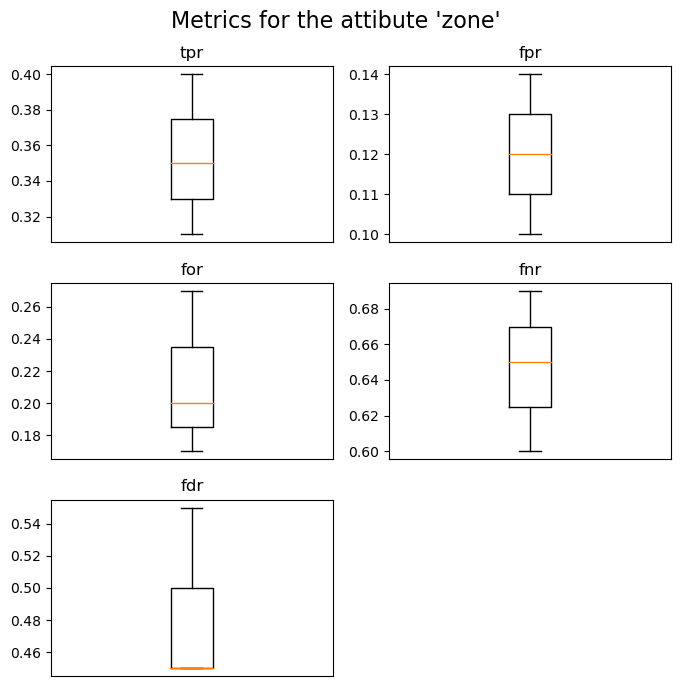

In [112]:
tab = xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)
metrics = ['tpr', 'fpr', 'for', 'fnr', 'fdr']
attributes = tab['attribute_name'].unique()

# Generar los gráficos
for attribute in attributes:
    fig, axs = plt.subplots(3, 2, figsize=(7, 7))
    
    # Aplanar el array de axis para facilitar su uso
    axs = axs.ravel()
    
    # Filtramos el dataframe por atributo
    attr_data = tab[tab['attribute_name'] == attribute]
    
    for i, metric in enumerate(metrics):
        # Dibujamos el boxplot para la métrica actual
        axs[i].boxplot(attr_data[metric].dropna())
        axs[i].set_title(metric)
        axs[i].set_xticks([])  # Eliminar ticks del eje x
        
    # Eliminar el último subplot que no se usa
    fig.delaxes(axs[-1])
    
    # Título del conjunto de boxplots
    plt.suptitle(f"Metrics for the attibute '{attribute}'", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Ajustar espacio para el título principal
    plt.show()

In [113]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,region,Antofagasta,0.42,0.89,0.34,0.24,0.11,0.58,0.66,0.76,0.02,0.24,0.44
1,region,Arica y Parinacota,0.23,0.83,0.35,0.56,0.17,0.77,0.65,0.44,0.02,0.19,0.37
2,region,Atacama,0.54,0.93,0.04,0.62,0.07,0.46,0.96,0.38,0.02,0.11,0.08
3,region,Aysén,0.52,0.67,0.20,0.64,0.33,0.48,0.80,0.36,0.02,0.38,0.26
4,region,Bio Bío,0.42,0.93,0.17,0.35,0.07,0.58,0.83,0.65,0.09,0.15,0.24
5,region,Coquimbo,0.41,0.84,0.17,0.58,0.16,0.59,0.83,0.42,0.09,0.22,0.23
6,region,La Araucanía,0.34,0.84,0.26,0.51,0.16,0.66,0.74,0.49,0.14,0.22,0.31
7,region,Libertador Bernardo O'Higgins,0.34,0.93,0.16,0.45,0.07,0.66,0.84,0.55,0.06,0.13,0.21
8,region,Los Lagos,0.20,0.87,0.50,0.35,0.13,0.80,0.50,0.65,0.07,0.17,0.53
9,region,Los Ríos,0.38,0.91,0.15,0.47,0.09,0.62,0.85,0.53,0.02,0.15,0.21


In [114]:
print('FPR: ',  xtab["fpr"].mean())
print('FNR: ',  xtab["fnr"].mean())
print('FDR: ',  xtab["fdr"].mean())
print('FOR: ',  xtab["for"].mean())

FPR:  0.16279698604474968
FNR:  0.6415987630579669
FDR:  0.5142745512959531
FOR:  0.2381752398931722


### Glosario de métricas absolutas:

- tpr = Proporción de verdaderos positivos.
- tnr = Proporción de verdaderos negativos.
- for = Proporción de falsos negativos sobre el total de negativos predecidos.
- fdr = Proporción de falsos positivos sobre el total de positivos predecidos.
- fpr = Proporción de falsos positivos sobre el total de negativos reales.
- fnr = Proporción de falsos negativos sobre el total de positivos reales.
- npv = Negative Predictive Value (?)
- ppr = Fracción de esta entidad que fue predecida positiva sobre el total de registros.
- pprev = Fracción de esta entidad del grupo que fue predecida como positva.
- prev = Fracción de esta entidad del grupo que es realemente positiva.

### Niveles de disparidad

In [115]:
b = Bias()
df.head()

,region,crime_stage,score,label_value,age,zone
0,La Araucanía,Consumado,0.0,0,42.0 - 54.0,Southern Chile
1,Maule,Consumado,0.0,0,18.0 - 30.0,Central Chile
2,Coquimbo,Consumado,1.0,0,42.0 - 54.0,Northern Chile
3,Libertador Bernardo O'Higgins,Consumado,0.0,1,30.0 - 42.0,Central Chile
4,Metropolitana,Frustrado,0.0,0,54.0 - 66.0,Central Chile


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11987 entries, 0 to 11986
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       11987 non-null  object 
 1   crime_stage  11987 non-null  object 
 2   score        11987 non-null  float64
 3   label_value  11987 non-null  int64  
 4   age          11987 non-null  object 
 5   zone         11987 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB


### Acá tomamos como referencia a los grupos mayoritarios de cada feature. 

In [117]:
grupo_mayoritario = b.get_disparity_major_group(xtab, original_df=df)
disp = grupo_mayoritario[['attribute_name', 'attribute_value'] +  b.list_disparities(grupo_mayoritario)]
disp

get_disparity_major_group()


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,region,Antofagasta,0.092213,1.713961,1.032804,0.910602,1.622579,1.998962,0.919278,1.138154,0.943617,0.836107
1,region,Arica y Parinacota,0.065574,1.334895,0.598039,2.095420,1.693656,3.178453,1.226546,0.612271,0.877046,0.817396
2,region,Atacama,0.106557,0.783712,0.525749,2.292425,0.197525,1.399444,0.727916,1.465667,0.977455,1.211250
3,region,Aysén,0.079918,2.653589,0.490699,2.387943,0.974734,6.157091,0.762805,1.405955,0.708928,1.006651
4,region,Bio Bío,0.397541,1.085935,0.887811,1.305737,0.798270,1.339783,0.923294,1.131282,0.980822,1.053105
5,region,Coquimbo,0.377049,1.536959,0.579467,2.146034,0.827866,3.061823,0.937301,1.107308,0.883628,1.045314
6,region,La Araucanía,0.584016,1.508562,0.666686,1.908343,1.233157,2.976866,1.041884,0.928316,0.888423,0.938622
7,region,Libertador Bernardo O'Higgins,0.270492,0.894663,0.745607,1.693269,0.755448,1.369577,1.051257,0.912275,0.979141,1.064378
8,region,Los Lagos,0.288934,1.173582,0.882214,1.320990,2.423305,2.357375,1.260310,0.554483,0.923388,0.625317
9,region,Los Ríos,0.077869,1.056792,0.719446,1.764564,0.739985,1.693045,0.986444,1.023202,0.960884,1.068449


In [118]:
print('FNR Disparity:', disp['fnr_disparity'].mean())
print('FOR Disparity:', disp['for_disparity'].mean())
print('TPR Disparity:', disp['tpr_disparity'].mean())

FNR Disparity: 1.0049811448050905
FOR Disparity: 1.080550389910273
TPR Disparity: 0.9920762107346748


### Acá tomamos como referencia a los valores mínimos de las métricas de cada grupo.

In [119]:
min_valores = b.get_disparity_min_metric(df=xtab, original_df=df)
disp = min_valores[['attribute_name', 'attribute_value'] +  b.list_disparities(grupo_mayoritario)]
disp

get_disparity_min_metric()


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,region,Antofagasta,2.142857,2.186977,2.871111,1.000000,8.214558,1.998962,1.353909,2.378601,1.331049,1.337093
1,region,Arica y Parinacota,1.523810,1.703297,1.662500,2.301136,8.574394,3.178453,1.806452,1.279570,1.237144,1.307171
2,region,Atacama,2.476190,1.000000,1.461538,2.517483,1.000000,1.399444,1.072072,3.063063,1.378780,1.937018
3,region,Aysén,1.857143,3.385922,1.364103,2.622378,4.934743,6.157091,1.123457,2.938272,1.000000,1.609825
4,region,Bio Bío,9.238095,1.385629,2.468041,1.433927,4.041366,1.339783,1.359823,2.364238,1.383529,1.684114
5,region,Coquimbo,8.761905,1.961126,1.610870,2.356719,4.191199,3.061823,1.380454,2.314136,1.246429,1.671655
6,region,La Araucanía,13.571429,1.924893,1.853333,2.095694,6.243050,2.976866,1.534483,1.940066,1.253193,1.501033
7,region,Libertador Bernardo O'Higgins,6.285714,1.141571,2.072727,1.859504,3.824573,1.369577,1.548287,1.906542,1.381157,1.702141
8,region,Los Lagos,6.714286,1.497465,2.452482,1.450677,12.268356,2.357375,1.856180,1.158801,1.302514,1.000000
9,region,Los Ríos,1.809524,1.348443,2.000000,1.937799,3.746289,1.693045,1.452830,2.138365,1.355404,1.708651


In [120]:
print('FNR Disparity:', disp['fnr_disparity'].mean())
print('FOR Disparity:', disp['for_disparity'].mean())
print('TPR Disparity:', disp['tpr_disparity'].mean())

FNR Disparity: 1.3264100785694366
FOR Disparity: 3.908925728821589
TPR Disparity: 1.7237923451860093


### Acá usamos un grupo base (de referencia) predefinido. Sería interesante comparar con respecto a los usuarios de la RM, de edad entre 18 y 34 años, no extranjeros, que pertenecen a la zona central del país.

In [121]:
grupo_definido = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                        ref_groups_dict={'region':'Metropolitana', 'crime_stage':'Consumado','age':'18.0 - 30.0','zone':'Central Chile'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)
disp = grupo_definido[['attribute_name', 'attribute_value'] +  b.list_disparities(grupo_mayoritario)]
disp

get_disparity_predefined_group()


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,region,Antofagasta,0.092213,1.713961,1.032804,0.910602,1.622579,1.998962,0.919278,1.138154,0.943617,0.836107
1,region,Arica y Parinacota,0.065574,1.334895,0.598039,2.095420,1.693656,3.178453,1.226546,0.612271,0.877046,0.817396
2,region,Atacama,0.106557,0.783712,0.525749,2.292425,0.197525,1.399444,0.727916,1.465667,0.977455,1.211250
3,region,Aysén,0.079918,2.653589,0.490699,2.387943,0.974734,6.157091,0.762805,1.405955,0.708928,1.006651
4,region,Bio Bío,0.397541,1.085935,0.887811,1.305737,0.798270,1.339783,0.923294,1.131282,0.980822,1.053105
5,region,Coquimbo,0.377049,1.536959,0.579467,2.146034,0.827866,3.061823,0.937301,1.107308,0.883628,1.045314
6,region,La Araucanía,0.584016,1.508562,0.666686,1.908343,1.233157,2.976866,1.041884,0.928316,0.888423,0.938622
7,region,Libertador Bernardo O'Higgins,0.270492,0.894663,0.745607,1.693269,0.755448,1.369577,1.051257,0.912275,0.979141,1.064378
8,region,Los Lagos,0.288934,1.173582,0.882214,1.320990,2.423305,2.357375,1.260310,0.554483,0.923388,0.625317
9,region,Los Ríos,0.077869,1.056792,0.719446,1.764564,0.739985,1.693045,0.986444,1.023202,0.960884,1.068449


In [122]:
print('FNR Disparity:', disp['fnr_disparity'].mean())
print('FOR Disparity:', disp['for_disparity'].mean())
print('TPR Disparity:', disp['tpr_disparity'].mean())

FNR Disparity: 1.0034063858427449
FOR Disparity: 1.0811366923354178
TPR Disparity: 0.9953718663240708


Seguiremos la investigación con este grupo.

In [123]:
grupo_definido[['attribute_name', 'attribute_value'] +  b.list_disparities(grupo_definido)]

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity
0,region,Antofagasta,0.910602,0.919278,1.622579,1.998962,0.836107,0.092213,1.713961,1.032804,0.943617,1.138154
1,region,Arica y Parinacota,2.095420,1.226546,1.693656,3.178453,0.817396,0.065574,1.334895,0.598039,0.877046,0.612271
2,region,Atacama,2.292425,0.727916,0.197525,1.399444,1.211250,0.106557,0.783712,0.525749,0.977455,1.465667
3,region,Aysén,2.387943,0.762805,0.974734,6.157091,1.006651,0.079918,2.653589,0.490699,0.708928,1.405955
4,region,Bio Bío,1.305737,0.923294,0.798270,1.339783,1.053105,0.397541,1.085935,0.887811,0.980822,1.131282
5,region,Coquimbo,2.146034,0.937301,0.827866,3.061823,1.045314,0.377049,1.536959,0.579467,0.883628,1.107308
6,region,La Araucanía,1.908343,1.041884,1.233157,2.976866,0.938622,0.584016,1.508562,0.666686,0.888423,0.928316
7,region,Libertador Bernardo O'Higgins,1.693269,1.051257,0.755448,1.369577,1.064378,0.270492,0.894663,0.745607,0.979141,0.912275
8,region,Los Lagos,1.320990,1.260310,2.423305,2.357375,0.625317,0.288934,1.173582,0.882214,0.923388,0.554483
9,region,Los Ríos,1.764564,0.986444,0.739985,1.693045,1.068449,0.077869,1.056792,0.719446,0.960884,1.023202


Aquí, la disparidad corresponde a la proporción de la métrica del atributo. Se hace con métrica del atributo/métrica atributo grupo control. 

In [124]:
metrics = ['fnr','for','tpr']
disparity_tolerance = 1.5 ### Este es nuestro Tau

In [125]:
grupo_definido = grupo_definido.replace(0,0.0002)

In [126]:
ap.summary(grupo_definido, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [127]:
ap.disparity(grupo_definido, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [128]:
ap.absolute(grupo_definido, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [129]:
ap.disparity(grupo_definido, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [130]:
ap.absolute(grupo_definido, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [131]:
ap.disparity(grupo_definido, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [132]:
ap.absolute(grupo_definido, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [133]:
ap.disparity(grupo_definido, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [134]:
ap.absolute(grupo_definido, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Ahora probando con el grupo mayoritario.

In [135]:
grupo_mayoritario[['attribute_name', 'attribute_value'] +  b.list_disparities(grupo_mayoritario)]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,region,Antofagasta,0.092213,1.713961,1.032804,0.910602,1.622579,1.998962,0.919278,1.138154,0.943617,0.836107
1,region,Arica y Parinacota,0.065574,1.334895,0.598039,2.095420,1.693656,3.178453,1.226546,0.612271,0.877046,0.817396
2,region,Atacama,0.106557,0.783712,0.525749,2.292425,0.197525,1.399444,0.727916,1.465667,0.977455,1.211250
3,region,Aysén,0.079918,2.653589,0.490699,2.387943,0.974734,6.157091,0.762805,1.405955,0.708928,1.006651
4,region,Bio Bío,0.397541,1.085935,0.887811,1.305737,0.798270,1.339783,0.923294,1.131282,0.980822,1.053105
5,region,Coquimbo,0.377049,1.536959,0.579467,2.146034,0.827866,3.061823,0.937301,1.107308,0.883628,1.045314
6,region,La Araucanía,0.584016,1.508562,0.666686,1.908343,1.233157,2.976866,1.041884,0.928316,0.888423,0.938622
7,region,Libertador Bernardo O'Higgins,0.270492,0.894663,0.745607,1.693269,0.755448,1.369577,1.051257,0.912275,0.979141,1.064378
8,region,Los Lagos,0.288934,1.173582,0.882214,1.320990,2.423305,2.357375,1.260310,0.554483,0.923388,0.625317
9,region,Los Ríos,0.077869,1.056792,0.719446,1.764564,0.739985,1.693045,0.986444,1.023202,0.960884,1.068449


In [136]:
grupo_mayoritario = grupo_mayoritario.replace(0,0.0002)

In [137]:
ap.summary(grupo_mayoritario, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [138]:
ap.disparity(grupo_mayoritario, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [139]:
ap.absolute(grupo_mayoritario, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [140]:
ap.disparity(grupo_mayoritario, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [141]:
ap.absolute(grupo_mayoritario, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [142]:
ap.disparity(grupo_mayoritario, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [143]:
ap.absolute(grupo_mayoritario, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [144]:
ap.disparity(grupo_mayoritario, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [145]:
ap.absolute(grupo_mayoritario, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Ahora probando con el grupo minoritario

In [146]:
min_valores[['attribute_name', 'attribute_value'] +  b.list_disparities(min_valores)]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,region,Antofagasta,2.142857,2.186977,2.871111,1.000000,8.214558,1.998962,1.353909,2.378601,1.331049,1.337093
1,region,Arica y Parinacota,1.523810,1.703297,1.662500,2.301136,8.574394,3.178453,1.806452,1.279570,1.237144,1.307171
2,region,Atacama,2.476190,1.000000,1.461538,2.517483,1.000000,1.399444,1.072072,3.063063,1.378780,1.937018
3,region,Aysén,1.857143,3.385922,1.364103,2.622378,4.934743,6.157091,1.123457,2.938272,1.000000,1.609825
4,region,Bio Bío,9.238095,1.385629,2.468041,1.433927,4.041366,1.339783,1.359823,2.364238,1.383529,1.684114
5,region,Coquimbo,8.761905,1.961126,1.610870,2.356719,4.191199,3.061823,1.380454,2.314136,1.246429,1.671655
6,region,La Araucanía,13.571429,1.924893,1.853333,2.095694,6.243050,2.976866,1.534483,1.940066,1.253193,1.501033
7,region,Libertador Bernardo O'Higgins,6.285714,1.141571,2.072727,1.859504,3.824573,1.369577,1.548287,1.906542,1.381157,1.702141
8,region,Los Lagos,6.714286,1.497465,2.452482,1.450677,12.268356,2.357375,1.856180,1.158801,1.302514,1.000000
9,region,Los Ríos,1.809524,1.348443,2.000000,1.937799,3.746289,1.693045,1.452830,2.138365,1.355404,1.708651


In [147]:
min_valores = min_valores.replace(0,0.0002)

In [148]:
ap.summary(min_valores, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [149]:
ap.disparity(min_valores, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [150]:
ap.absolute(min_valores, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [151]:
ap.disparity(min_valores, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [152]:
ap.absolute(min_valores, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [153]:
ap.disparity(min_valores, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [154]:
ap.absolute(min_valores, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [155]:
ap.disparity(min_valores, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [156]:
ap.absolute(min_valores, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Niveles de paridad

In [157]:
f = Fairness()
fdf = f.get_group_value_fairness(grupo_definido)

In [158]:
parity_detrminations = f.list_parities(fdf)

In [159]:
a = pd.DataFrame(fdf[['attribute_name', 'attribute_value'] + absolute_metrics]) #+ b.list_disparities(fdf) + parity_detrminations].style)
a[['tpr', 'fnr', 'for', 'fdr']] = a[['tpr', 'fnr', 'for', 'fdr']].round(4)

# Mostrar el DataFrame actualizado
display(a[['attribute_name', 'attribute_value', 'tpr', 'fnr', 'for', 'fdr']].head(16))


,attribute_name,attribute_value,tpr,fnr,for,fdr
0,region,Antofagasta,0.4198,0.5802,0.3381,0.2444
1,region,Arica y Parinacota,0.2258,0.7742,0.3529,0.5625
2,region,Atacama,0.5405,0.4595,0.0412,0.6154
3,region,Aysén,0.5185,0.4815,0.2031,0.6410
4,region,Bio Bío,0.4172,0.5828,0.1664,0.3505
5,region,Coquimbo,0.4084,0.5916,0.1725,0.5761
6,region,La Araucanía,0.3424,0.6576,0.2570,0.5123
7,region,Libertador Bernardo O'Higgins,0.3364,0.6636,0.1574,0.4545
8,region,Los Lagos,0.2045,0.7955,0.5050,0.3546
9,region,Los Ríos,0.3774,0.6226,0.1542,0.4737


In [160]:
gaf = f.get_group_attribute_fairness(fdf)
gaf[['attribute_name', 'Statistical Parity', 'FNR Parity', 'FOR Parity', 'TPR Parity', 'Unsupervised Fairness', 'Supervised Fairness']]

,attribute_name,Statistical Parity,FNR Parity,FOR Parity,TPR Parity,Unsupervised Fairness,Supervised Fairness
0,age,True,True,True,True,True,True
1,crime_stage,False,True,False,False,False,False
2,region,False,False,False,False,False,False
3,zone,False,True,False,True,False,False


In [161]:
equidad = f.get_overall_fairness(gaf)
equidad

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}